
This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston) The dataset is small in size with only 506 cases and 14 features. The details about this dataset available on -https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html The purpose of the database is to leverage the available data to predict the prices of houses in Boston using machine learning algorithms.
This note book contains
1. Data Exploration 
2. Data visualization
3. Data Preprocessing
4. Hyper Tuning of the parameters
5. Model Builing using Various techniques
6 .Result Prediction



In [1]:
## Importing the basic libraries
import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
## Importind the data into the system for futher analysis
print(os.listdir("../input"))
col = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing=pd.read_csv('../input/housing.csv',delim_whitespace=True, names=col)

['housing.csv']


In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
## Check the spread of the data and identify potential outliers at glance
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
# Verify the type and categories of data and is there any missing values present that we need to take care
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


**Analysis From above step:**
> This reflect  that data is quite clean and most of the variables are float and few of them are integers, no imputations or filling up values required.

# 2 Exploratory Data analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe41f30ada0>,
      dtype=object)

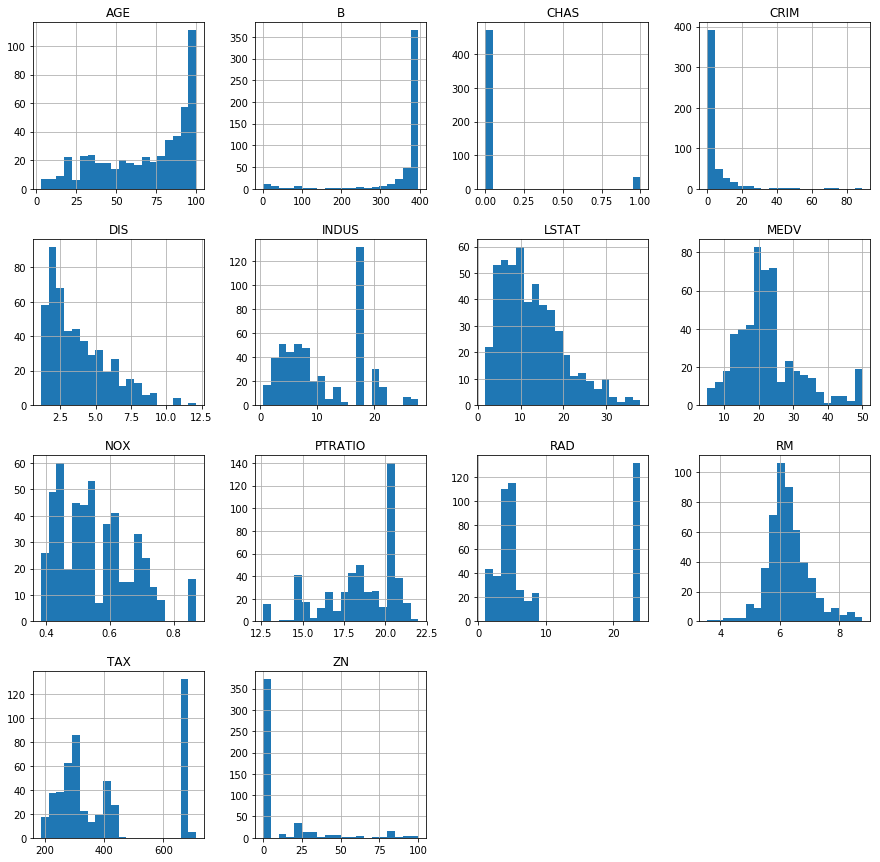

In [6]:
housing.hist(bins=20,figsize=(15,15))

It seems that many variables like Age,B,MEDV,RAD ..etc are caped, It seems this sample size might not be representative of sample space, 

##Let's explore each of the variables and see how are they affecting each i'e check correlation for each of the varibles by plotting box plot and analysing how does the shape of variables are and the test way to visualize is to look at the box plot for each of the variables

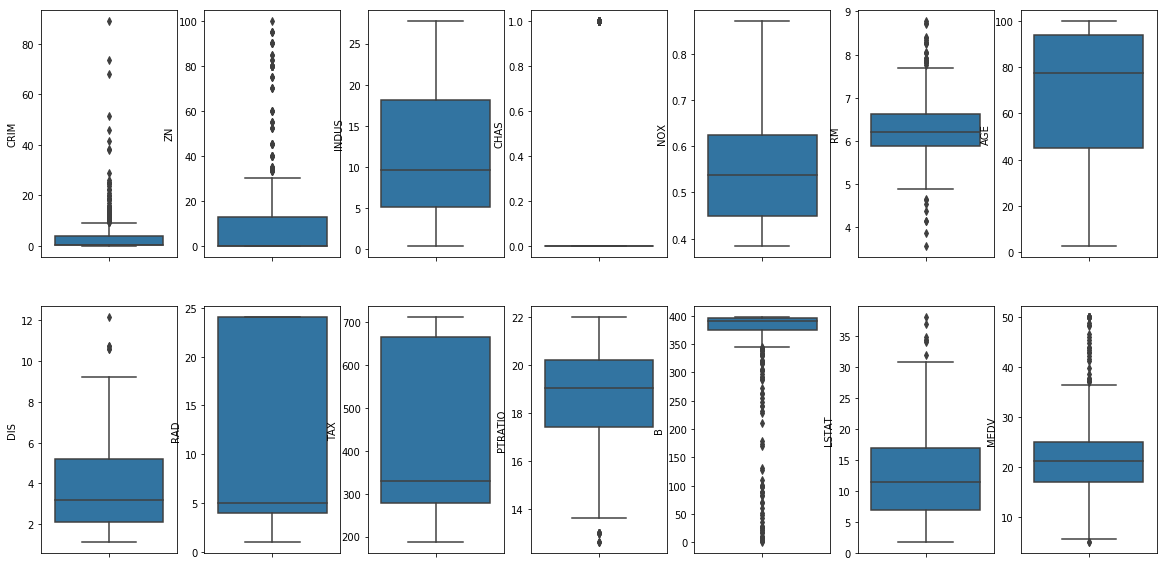

In [7]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in housing.items():
    sns.boxplot(y=k, data=housing, ax=axs[index])
    index += 1

**Observations:**
**CRIM Variable**

It has very short data bandwidth and correlation is not that segnificant being +0.39 which makes it an important parameter for prediction, but it have quite heavy outliers that needs to be handled carefully.

             CRIM
count  506.000000
mean     3.613524
std      8.601545
min      0.006320
25%      0.082045
50%      0.256510
75%      3.677082
max     88.976200
Minimum Cut off Value -22.191111
Maximum Cut Off Value 29.418158999999996
Final shape of the dataset (498, 14)


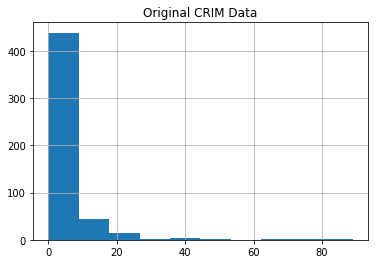

In [8]:
CRIM_data=pd.DataFrame(housing.iloc[:,0])
print(CRIM_data.describe())
CRIM_data.hist()
plt.title("Original CRIM Data")
min_cutoff=3.613524-3*8.601545
print("Minimum Cut off Value",min_cutoff)
max_cutoff=3.613524+3*8.601545
print("Maximum Cut Off Value",max_cutoff)
# Values beyond 29.4 must be dropped becasue they are potential outliers so dropping these 4 values
housing_df = housing.drop(housing[housing.CRIM>29.4].index)
print("Final shape of the dataset",housing_df.shape)

Text(0.5, 1.0, 'New CRIM Data')

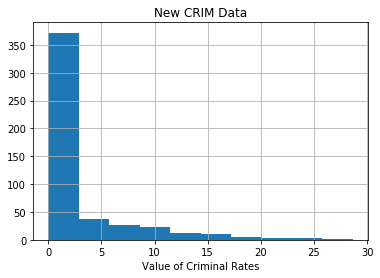

In [9]:
CRIM_data_new=pd.DataFrame(housing_df.iloc[:,0])
CRIM_data_new.hist()
plt.xlabel("Value of Criminal Rates")
plt.title("New CRIM Data")

**Conclusion for CRIM Data variable:** Inspite of having a very small size data, it very important to remove the potential outlier from the data set, Incase it is not effecting to much target varibles, if it is further analysis is required, I will remove the excess data +/- 3 standard Deviation from the mean
    

**2. ZN Variable**** Observation

               ZN
count  498.000000
mean    11.546185
std     23.464449
min      0.000000
25%      0.000000
50%      0.000000
75%     12.500000
max    100.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe41a783828>]],
      dtype=object)

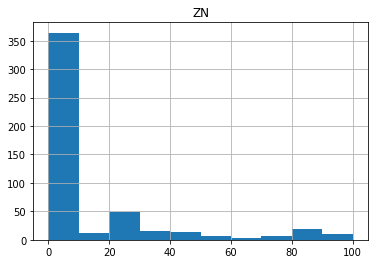

In [10]:
ZN_data=pd.DataFrame(housing_df.iloc[:,1])
print(ZN_data.describe())
ZN_data.hist()

Minimum Cut off Value -58.84716199999999
Maximum Cut Off Value 81.93953199999999


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe41a713400>]],
      dtype=object)

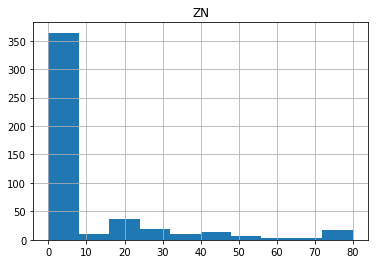

In [11]:
min_cutoff=11.546185-3*23.464449
print("Minimum Cut off Value",min_cutoff)
max_cutoff=11.546185+3*23.464449
print("Maximum Cut Off Value",max_cutoff)
housing_df_N = housing_df.drop(housing_df[housing.ZN>=82].index)
CRIM_data_new=pd.DataFrame(housing_df_N.iloc[:,1])
CRIM_data_new.hist()

3. **CHAS Variable**
This is a categorical variablle and has only 2 distinct values, and this column is already dummified so no need to take any action upon it

4. **INDUS Variable**
     Since dataset is extremely small so thinking not to remove the outliers, but when dataset is large it is advisible to remove few outliers from the data to make the mode fit

count    484.000000
mean      11.282376
std        6.782492
min        0.460000
25%        5.320000
50%        9.690000
75%       18.100000
max       27.740000
Name: INDUS, dtype: float64


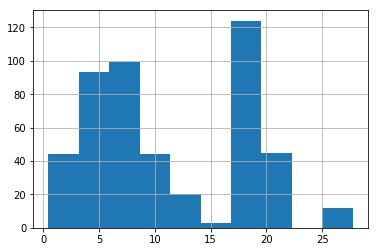

In [12]:
housing_df_N['INDUS'].hist()
print(housing_df_N['INDUS'].describe())

5. ** MDEV**
Target variable

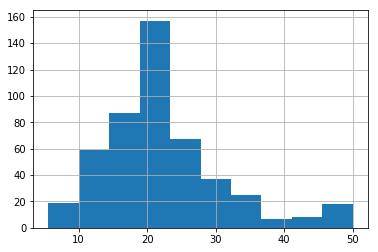

In [13]:
housing_df_N['MEDV'].hist()

In [14]:
housing_df_N['MEDV'].describe()

count    484.000000
mean      22.370248
std        8.802114
min        5.600000
25%       17.100000
50%       21.100000
75%       24.850000
max       50.000000
Name: MEDV, dtype: float64

In [15]:
lower_limit=22.370248-3*8.802114
upper_limit=22.370248+3*8.802114
print(upper_limit,lower_limit) ## No action been been taken due to small data size
housing_df_M = housing_df_N.drop(housing_df_N[housing_df_N.MEDV>48.77659].index)

48.77659 -4.0360939999999985


**B variable**

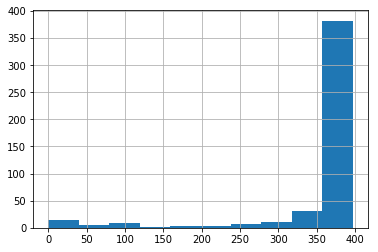

In [16]:
housing_df_M['B'].hist()

In [17]:
housing_df_M['B'].describe()

count    469.000000
mean     357.443774
std       89.488195
min        0.320000
25%      375.870000
50%      391.710000
75%      396.420000
max      396.900000
Name: B, dtype: float64

In [18]:
upper_limit=358.160764+3*88.205368
lower_limit=358.160764-3*88.205368
print("Upper cut off value",upper_limit)
print("Lower Cut off Value",lower_limit) ## I will come back later on this based on model under fitting and over fitting

Upper cut off value 622.7768679999999
Lower Cut off Value 93.54465999999996


In [19]:
housing_df_O = housing_df_M.drop(housing_df_M[housing_df_M.B<92].index)

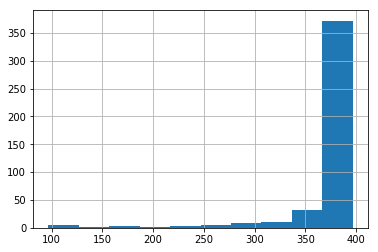

In [20]:
housing_df_O['B'].hist()

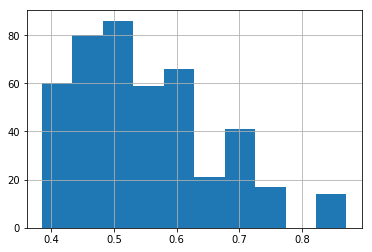

In [21]:
housing_df_O['NOX'].hist()

In [22]:
housing_df_O['NOX'].describe()

count    444.000000
mean       0.548731
std        0.113262
min        0.385000
25%        0.449000
50%        0.524000
75%        0.614000
max        0.871000
Name: NOX, dtype: float64

In [23]:
housing_df_O['RM'].describe()

count    444.000000
mean       6.231655
std        0.641697
min        3.561000
25%        5.877750
50%        6.173000
75%        6.553000
max        8.780000
Name: RM, dtype: float64

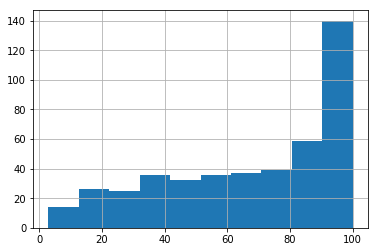

In [24]:
housing_df_O['AGE'].hist()

In [25]:
housing_df_O['AGE'].unique()
housing_df_P = housing_df_O.drop(housing_df_O[housing_df_O.MEDV>48.77659].index)

In [26]:
housing_df_P.shape

(444, 14)

In [27]:
housing_df_O['DIS'].describe()

count    444.000000
mean       3.870341
std        2.031826
min        1.137000
25%        2.204600
50%        3.412550
75%        5.218725
max       10.710300
Name: DIS, dtype: float64

In [28]:
housing_df_P['LSTAT'].describe()

count    444.000000
mean      12.522477
std        6.699438
min        1.980000
25%        7.320000
50%       11.360000
75%       16.292500
max       37.970000
Name: LSTAT, dtype: float64

In [29]:
lower_limit=12.522477-3*6.699438
upper_limit=12.522477+3*6.699438
print("Lower Limit",lower_limit)
print("Upper Limit",upper_limit)

Lower Limit -7.575836999999998
Upper Limit 32.620791


In [30]:
housing_df_Q = housing_df_P.drop(housing_df_P[housing_df_P.MEDV>32.620791].index) ## rm the value>32.620791

In [31]:
housing_df_Q.shape

(403, 14)

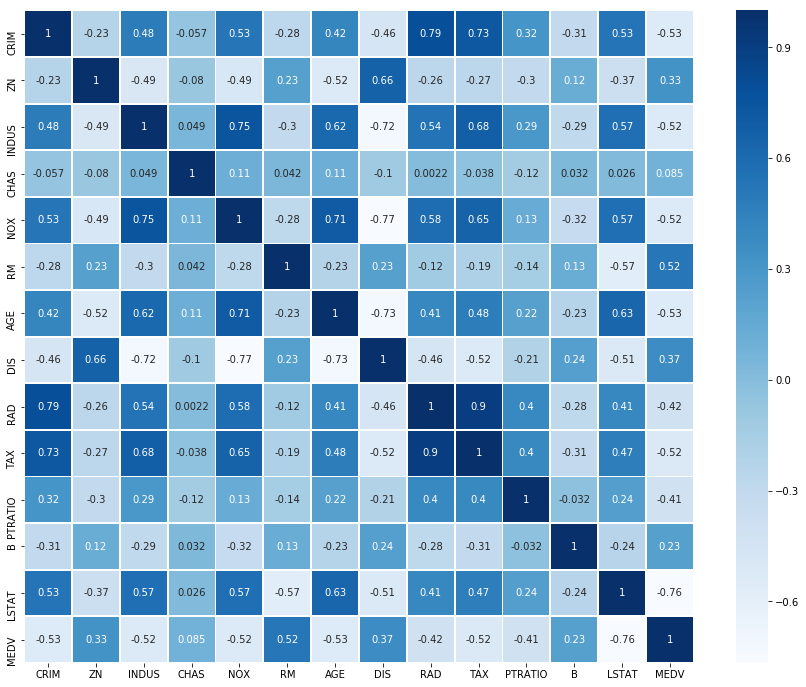

In [32]:
plt.figure(figsize = (15,12))
sns.heatmap(data=housing_df_Q.corr(), annot=True,linewidths=.8,cmap='Blues')

From heat map we have observed that TAX ,RAD ,CRIM are highly correlated and CHAS , PTRATIO and B are quite less correlated
wrt .to target variable RM positively and LSAT is negatively correlated and hence their impact
### In case prediction is not up to mark need to remove one of these highly correlated variable

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


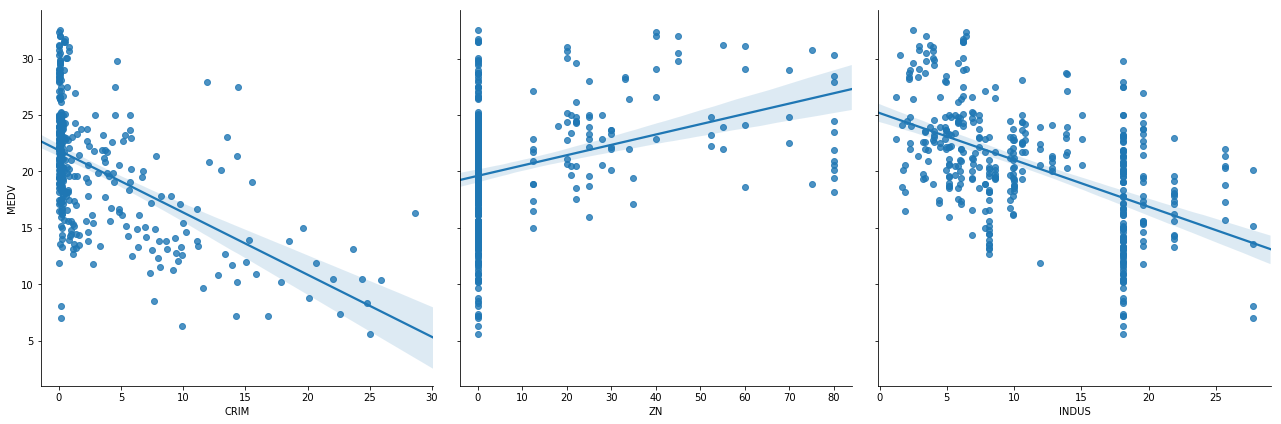

In [33]:
sns.pairplot(housing_df_Q,x_vars=["CRIM","ZN","INDUS"],y_vars =["MEDV"], kind="reg",height=6)

1. ["CRIM","ZN","INDUS"] features are reflect  weak correlation with MDEV variable
2. CRIM has negative correlation with prices. The areas with lower rate of crime has high prices and vice versa.and there are few areas are with high crime rate else most of the areas has lower crime rate.
3. ZN - proportiion residential land zoned --this feature posses positive correlation with prices. More the residelntial land zone more higher the housing prices.And also it shows that threr are a large group of area has low prportion of residential land zone.
 4. INDUS- proportion of non retail bussiness acre per town - it shows negative correlation. As the proportion decreases the housing prices lowers.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


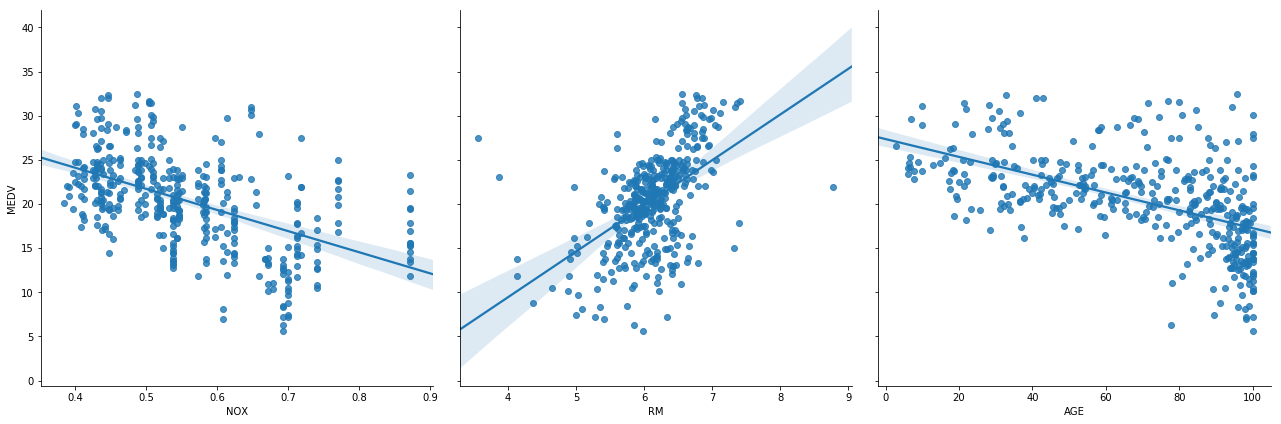

In [34]:
sns.pairplot(housing_df_Q,x_vars=["NOX","RM","AGE"],y_vars =["MEDV"], kind="reg",height=6)

 1. NOX- Nitric oxide concentration - it shows negatve correaltion .We can see the areas with high cocentration has lower housing prices. lower the pollution of air , higher the housing prices.
 2. RM- Avg number of room per house. -  it is obivious that as number of rooms increases the area of house increase and prices will be more. the sme trend we can see in the plot. Also it has strong correlation with prices as compared to other parameters we saw upto now.
 3. AGE- proportion of owner-occupied units built prior to 1940 - this feature shows negative correlation . the older the property lower the housing prices . we can seee the dataset has slighlty more number of old houses.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


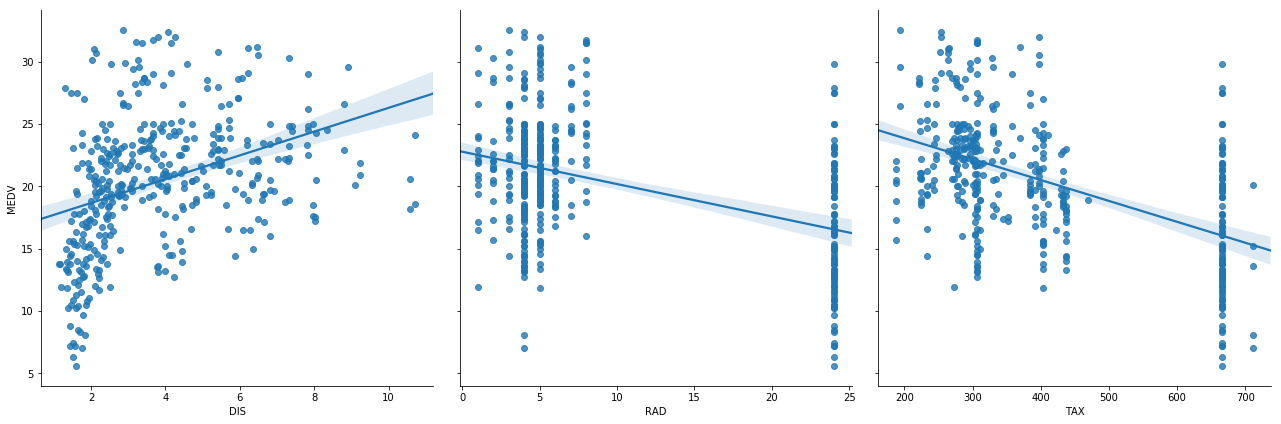

In [35]:
sns.pairplot(housing_df_Q,x_vars=["DIS","RAD","TAX"],y_vars =["MEDV"], kind="reg",height=6)

 1. DIS-    weighted distances to five Boston employment centres - This feature shows Positive correlation with housing prices. the areas near to the employment centres/ work places has high prices which is obivious trend we do see in housing prices.
 2. RAD-index of accessibility to radial highways- there is negative correlation with prices.Alos we can see that a lot of areas has low index and few areas has high index for highway accessibility. Mthe plot shows people do not prefer houses near the highways.
 3.TAX- full-value property-tax rate per USD 10,000 -Tax Rate shows negative correlation with housing prices. Higher the property tax lower the prices in that area. the housing prics are high where the propery taxes are low. people prefer areas with lower property tax.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


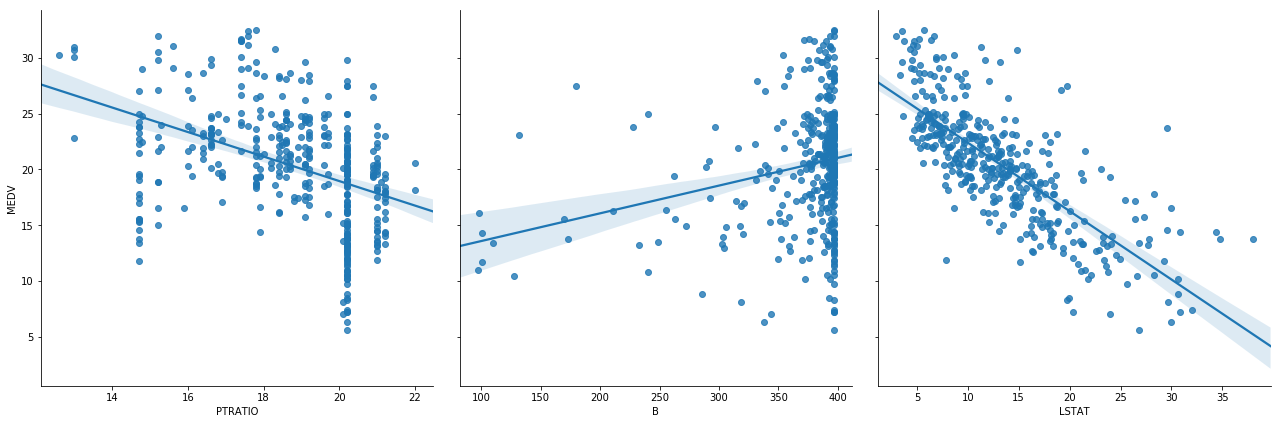

In [36]:
sns.pairplot(housing_df_Q,x_vars=["PTRATIO","B","LSTAT"],y_vars =["MEDV"], kind="reg",height=6)

1. PTRATIO- pupil-teacher ratio by town - this feature has negative correltion with housing prices. 
2. B - proportion of blacks by town - It shows positive correlaton with prices.
3.LSTAT-LSTAT - % lower status of the population - This shows strong postive correation . it does not show direct correltion. the plot shows somewhat curvilinear nature.

Till now we checked the individual relations with feature variable. And almost all variable shows linear relationship with target variable. Not every feature has strong correlation. Eventually we will find out which are not the good features for prediction. As the target variable has continous values we wil go for regression techniques. First lets try with Multiple linear regression.

The preassumption for Linear regression is that the features used for moel should not be correlated . From scatter plots above we checked linear relationship of individual feature with target variable.
Lets check the correlation of all features with each other using corrrelaton matrix

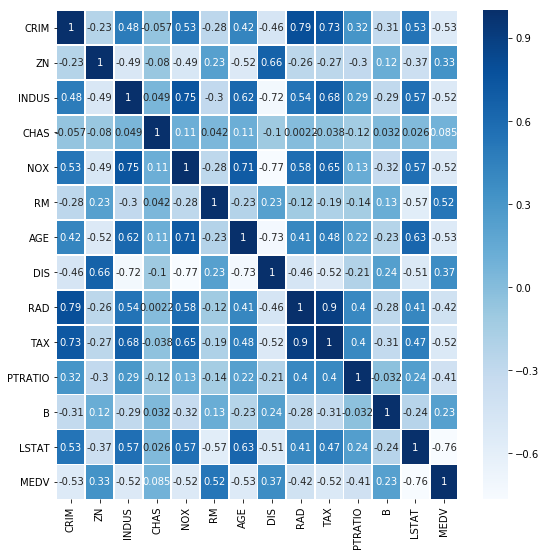

In [37]:
plt.figure(figsize = (9,9))
sns.heatmap(data=housing_df_Q.corr(), annot=True,linewidths=.8,cmap='Blues')

** Considering the continous value of the housing price targer variable this above problem is considered to be a regression task**

**Regression Model Using Linear Regression**

In [38]:
housing_df_Q.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1


In [39]:
import numpy as np
def split_train_test(data,test_ratio):
    shuffled_indicies=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indicies=shuffled_indicies[:test_set_size]
    train_indicies=shuffled_indicies[test_set_size:]
    return data.iloc[test_indicies],data.iloc[train_indicies]
test_set,train_set=split_train_test(housing_df_Q,0.2)

In [40]:
def training_and_testing_set(test_set,train_set):
    test_set_x=test_set.iloc[:,:-1]
    test_set_y=test_set.iloc[:,-1]
    train_set_x=train_set.iloc[:,:-1]
    train_set_y=train_set.iloc[:,-1]
    return test_set_x,test_set_y,train_set_x,train_set_y
test_set_x,test_set_y,train_set_x,train_set_y=training_and_testing_set(test_set,train_set)
print(test_set_x.shape,test_set_y.shape,train_set_x.shape,train_set_y.shape)

(80, 13) (80,) (323, 13) (323,)


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lin_reg=LinearRegression()
lin_reg.fit(train_set_x,train_set_y)
y_pred=lin_reg.predict(test_set_x)
mserr=mean_squared_error(test_set_y,y_pred)
print("Mean Squared Error",mserr)
root_mean_squared_error=np.sqrt(mserr)
print("Root Mean Squared Error",root_mean_squared_error)

Mean Squared Error 5.159335852845035
Root Mean Squared Error 2.271417146374711


** Linear Regression Using Backward Elimination **

In [42]:
import statsmodels.formula.api as sm

In [43]:
X=housing_df_Q.iloc[:,:-1].values
y=housing_df_Q.iloc[:,-1].values

In [44]:
X.shape

(403, 13)

In [45]:
X1=np.append(arr=np.ones((403, 1),int).astype(int),values = X,axis =1)

In [46]:
# soring the optimal dataset in X_opt
X_opt = X1[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     80.16
Date:                Fri, 22 Mar 2019   Prob (F-statistic):          2.44e-101
Time:                        01:04:44   Log-Likelihood:                -980.24
No. Observations:                 403   AIC:                             1988.
Df Residuals:                     389   BIC:                             2044.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.4688      3.539     12.567      0.000      37.512      51.426
x1            -0.2377      0.050     -4.751      0.000      -0.336      -0.139
x2             0.0249      0.011      2.351      0.019       0.004       0.046
x3            -0.0038      0.039     -0.096      0.923      -0.081       0.073
x4             1.0553      0.614      1.718      0.087      -0.152       2.263
x5           -12.0806      2.481     -4.870      0.000     -16.958      -7.204
x6             1.0993      0.336      3.276      0.001       0.439       1.759
x7            -0.0249      0.009     -2.898      0.004      -0.042      -0.008
x8            -1.0063      0.138     -7.302      0.000      -1.277      -0.735
x9             0.2620      0.046      5.646      0.000       0.171       0.353
x10           -0.0106      0.002     -4.438      0.000      -0.015      -0.006
x11           -0.6230      0.086     -7.258      0.000      -0.792      -0.454
x12            0.0012      0.003      0.384      0.701      -0.005       0.007
x13           -0.3760      0.036    -10.534      0.000      -0.446      -0.306
==============================================================================
Omnibus:                       26.507   Durbin-Watson:                   1.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.526
Skew:                           0.488   Prob(JB):                     4.31e-09
Kurtosis:                       4.158   Cond. No.                     1.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
X_opt = X1[:,[0,1,2,5,6,8,9,10,11,13]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     112.5
Date:                Fri, 22 Mar 2019   Prob (F-statistic):          5.28e-103
Time:                        01:04:44   Log-Likelihood:                -985.90
No. Observations:                 403   AIC:                             1992.
Df Residuals:                     393   BIC:                             2032.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2240      3.330     13.881      0.000      39.677      52.771
x1            -0.2466      0.050     -4.955      0.000      -0.344      -0.149
x2             0.0269      0.011      2.531      0.012       0.006       0.048
x3           -13.8090      2.314     -5.967      0.000     -18.359      -9.259
x4             0.9208      0.331      2.785      0.006       0.271       1.571
x5            -0.9048      0.129     -7.010      0.000      -1.159      -0.651
x6             0.2827      0.045      6.251      0.000       0.194       0.372
x7            -0.0114      0.002     -5.177      0.000      -0.016      -0.007
x8            -0.6616      0.085     -7.803      0.000      -0.828      -0.495
x9            -0.4145      0.033    -12.648      0.000      -0.479      -0.350
==============================================================================
Omnibus:                       19.888   Durbin-Watson:                   1.218
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.767
Skew:                           0.426   Prob(JB):                     2.54e-06
Kurtosis:                       3.900   Cond. No.                     1.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
X_opt = X1[:,[0,1,5,6,8,9,10,11,13]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     124.1
Date:                Fri, 22 Mar 2019   Prob (F-statistic):          1.08e-102
Time:                        01:04:44   Log-Likelihood:                -989.16
No. Observations:                 403   AIC:                             1996.
Df Residuals:                     394   BIC:                             2032.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2199      3.353     13.786      0.000      39.628      52.811
x1            -0.2282      0.050     -4.604      0.000      -0.326      -0.131
x2           -14.1375      2.326     -6.077      0.000     -18.711      -9.564
x3             1.0082      0.331      3.046      0.002       0.357       1.659
x4            -0.7383      0.112     -6.603      0.000      -0.958      -0.519
x5             0.2669      0.045      5.919      0.000       0.178       0.356
x6            -0.0103      0.002     -4.737      0.000      -0.015      -0.006
x7            -0.7185      0.082     -8.730      0.000      -0.880      -0.557
x8            -0.4177      0.033    -12.669      0.000      -0.482      -0.353
==============================================================================
Omnibus:                       21.014   Durbin-Watson:                   1.200
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.939
Skew:                           0.465   Prob(JB):                     2.33e-06
Kurtosis:                       3.825   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_opt,y,test_size = 0.3,random_state = 1)
regressor.fit(X_train,y_train)

NameError: name 'train_test_split' is not defined

In [50]:
y_pred = regressor.predict(X_test)

print("RMSE: %.2f"% np.sqrt(((y_pred - y_test) ** 2).mean()))

NameError: name 'regressor' is not defined

We can see there is improvment in regressor performance after elimination of features. there is improvment in RMSE values And there is still scope of improvment.

Lets try out the Random forest regression model on data. because the LSTAT feature shows some curvilinear nature and few shows direct correation. The dataset is combination of Linear and non linear Features.

** Linear Regression Using Random Forest**

In [51]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200,random_state=0)

In [52]:
rf.fit(train_set_x,train_set_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [53]:
y_pred1=rf.predict(test_set_x)

In [54]:
mserr=mean_squared_error(test_set_y,y_pred1)
print("Mean Squared Error",mserr)
root_mean_squared_error=np.sqrt(mserr)
print("Root Mean Squared Error",root_mean_squared_error)

Mean Squared Error 5.6295387093750024
Root Mean Squared Error 2.3726648961399928


In [55]:
from sklearn.metrics import r2_score
r2 = r2_score(test_set_y,y_pred1)
r2

0.7301210289739173